In [208]:
import numpy as np
import matplotlib.pyplot as plt

#Importando os dados



In [209]:
filename = '/content/drive/My Drive/dados_colab/Redes Neurais/PP2/dataAll.txt'
dt = np.dtype(float)
arq = np.fromfile(filename, dtype=dt)

dados = np.empty((0, 3), float)

for i in range(0, len(arq), 3):
  temp = np.array([[arq[i], arq[i+1], arq[i+2]]])
  dados = np.append(dados, temp, axis=0)

#Perceptron
Algoritmo de treinamento do perceptron

In [210]:
n = 0.1 #Taxa de aprendizado
teta = 0 #Degrau usado na função de ativação
w = np.random.uniform(-0.5, 0.5, (1, 3)) #Vetor de pesos inicial
print("Vetor inicial de pesos: {}\n".format(w[0]))

def funcao(u): #Função de ativação
  if(u >= teta):
    return 1
  else:
    return 0

i = 0
ult_indice = len(dados) - 1
encerrar = True
qtd_epocas = 0
total_ajustes = 0

while i <= ult_indice:
  
  if (i == 0): #Verifica a a quantidade de épocas
    qtd_epocas += 1
    print('Época: {}'.format(qtd_epocas))
  
  linha = dados[i]
  yd = linha[2]
  x = np.array([-1, linha[0], linha[1]])

  u = 0
  for j in range(3):
    u += (x[j] * w[-1][j])

  y = funcao(u) #Chama a função de ativação
  e = yd - y #Erro

  if (e != 0): #Há necessidade de aprendizagem
    print('Ajuste do peso: {} -> Exemplo: {}'.format(w[-1], i + 1))
    peso_novo = np.array([w[-1] + ((n * e) * x)]) #Delta
    w = np.append(w, peso_novo, axis=0) #Começa a próxima época
    encerrar = False
    total_ajustes += 1

  if (ult_indice == i): #Última linha
    print('Número de ajustes: {}'.format(total_ajustes))
    print('Vetor de pesos: ', w[-1])
    print('\n')
    if (encerrar == False):
      total_ajustes = 0
      encerrar = True
      i = -1 #Vai para o começo do array de dados

  i += 1

print('Total de ajustes: ', len(w) - 1)
print('Total de épocas: ', qtd_epocas)

Vetor inicial de pesos: [ 0.22927015 -0.27768239  0.00066017]

Época: 1
Ajuste do peso: [ 0.22927015 -0.27768239  0.00066017] -> Exemplo: 1
Ajuste do peso: [  0.32927015  36.10115761 -24.41356983] -> Exemplo: 4
Ajuste do peso: [   0.42927015  -17.55789239 -100.90931983] -> Exemplo: 8
Ajuste do peso: [  0.32927015  55.23812761 -65.07975983] -> Exemplo: 19
Ajuste do peso: [  0.22927015 137.83682761  14.77607017] -> Exemplo: 27
Ajuste do peso: [  0.32927015 143.68258761 -63.51851983] -> Exemplo: 32
Ajuste do peso: [   0.42927015  103.67367761 -141.41120983] -> Exemplo: 44
Ajuste do peso: [  0.52927015 157.34348761 -92.31893983] -> Exemplo: 46
Ajuste do peso: [   0.42927015  104.38342761 -149.18839983] -> Exemplo: 48
Ajuste do peso: [  0.52927015 163.94294761 -99.06606983] -> Exemplo: 72
Ajuste do peso: [   0.42927015  118.41831761 -164.70199983] -> Exemplo: 108
Ajuste do peso: [  0.52927015 209.13417761 -89.98867983] -> Exemplo: 111
Ajuste do peso: [   0.42927015  151.35318761 -150.296829

#Classes binárias
Separando os exemplos segundos os valores de yd correspondentes as classes binárias.
* O ndarray zero corresponde a classe 0.
* O ndarray um corresponde a classe 1.

In [211]:
zero = np.empty((0,3), float)

for x in range(len(dados)):
  if (dados[x][2] == 0):
    temp = np.array([dados[x]])
    zero = np.append(zero, temp, axis=0)

um = np.empty((0,3), float)

for x in range(len(dados)):
  if (dados[x][2] == 1):
    temp = np.array([dados[x]])
    um = np.append(um, temp, axis=0)

#Gráfico
* A cor vermelha é correspondente a classe 0 dos valores de yd.
* A cor azul é correspondente a classe 1 dos valores de yd.

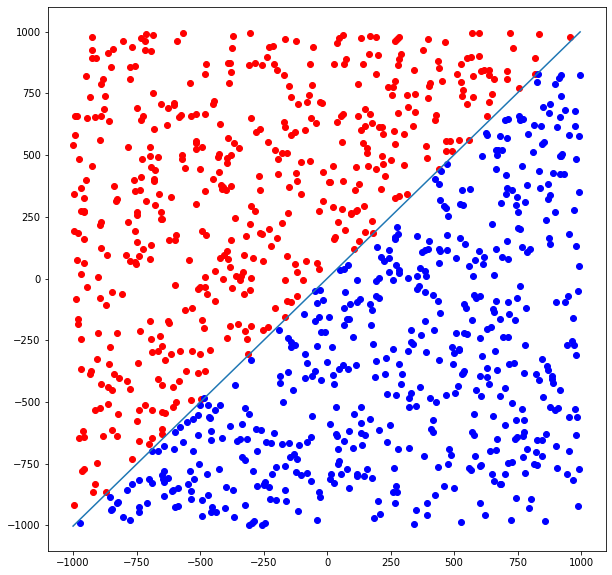

In [212]:
maximo = np.max(dados)
minimo = np.min(dados)
intervalo = maximo - minimo
peso = w[-1]

if (intervalo > 50):
  x = np.arange(minimo, maximo, 1)
elif (intervalo > 5):
  x = np.arange(minimo, maximo, 0.1)
else: 
  x = np.arange(minimo, maximo, 0.01)

plt.figure(figsize=(10, 10))
plt.scatter(zero[0:,0],zero[0:,1], color='red')  #vermelho
plt.scatter(um[0:,0],um[0:,1], color='blue')     #Azul
plt.plot(x, (peso[0]/peso[2]) - ((peso[1]/peso[2]) * x))
plt.show()

#Experimentação